In [656]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats, interpolate
import sympy

### Obtaining the data: 
Archives "Pk-fiducial-z_0_.dat" and "Pknw-fiducial-z_0_.dat" \
Columns: $k$ , $Pk/ s_8^2$ ,  $s_8$

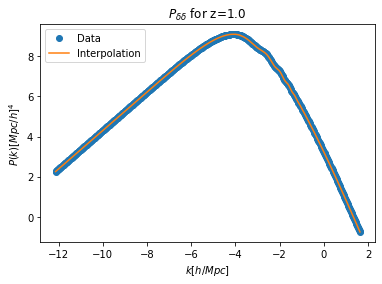

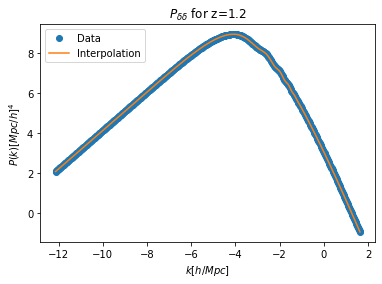

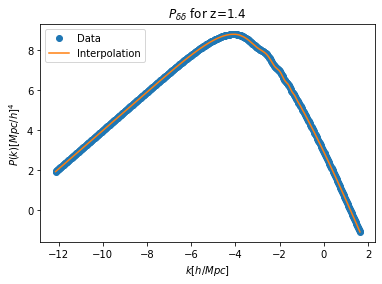

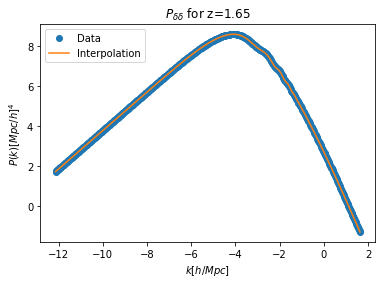

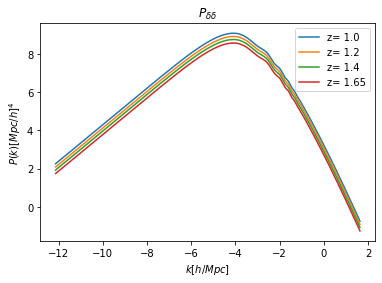

In [657]:
# f and D for each z_mean:
f = [0.8790616234808487, 0.9052940279841754, 0.9248305916607235, 0.942646864519483]
D = [0.6051299241324081, 0.5557769195555776, 0.5132266632166314, 0.46785418122063316]

# Based on table 3 of the page 14:
n = [6.86 * 10**(-4), 5.58 * 10**(-4), 4.21* 10**(-4), 2.61 * 10**(-4)]
V_s = [7.94, 9.15, 10.05, 16.22]
#galazy bias factor
b = [1.46, 1.61, 1.75, 1.9]

# Centered position of each bin
z_i = [1., 1.2, 1.4, 1.65]
z_min = [0.9, 1.1, 1.3, 1.5]
z_max = [1.1, 1.3, 1.5, 1.8]


Pk_00 = np.loadtxt("Pk-fiducial\Pk-fiducial-z_00.dat")
Pk_01 = np.loadtxt("Pk-fiducial\Pk-fiducial-z_01.dat")
Pk_02 = np.loadtxt("Pk-fiducial\Pk-fiducial-z_02.dat")
Pk_03 = np.loadtxt("Pk-fiducial\Pk-fiducial-z_03.dat")

Pk_ = [Pk_00,Pk_01, Pk_02, Pk_03 ]

# Cubic spline interpolation
k_= np.empty(4, dtype=object)
y_= np.empty(4, dtype=object)
P_dd_ = np.empty(4, dtype=object)
k_new= np.empty(4, dtype=object)
y_new= np.empty(4, dtype=object)

# i recorre los redshifts
for i in range(0,4):
    k_[i] = np.log(Pk_[i][:,0])
    y_[i] = np.log(Pk_[i][:,1] * (Pk_[i][:,2]**2))
    P_dd_[i] = interpolate.interp1d(k_[i], y_[i], kind='cubic')
    k_new[i] = np.log(np.arange(Pk_[i][:,0][0], Pk_[i][:,0][-1], 0.0001))
    y_new[i] = P_dd_[i](k_new[i])
    plt.title(r"$P_{\delta \delta}$ for z=" + f"{z_i[i]}")
    plt.plot(k_[i], y_[i], 'o', label= "Data")
    plt.plot(k_new[i], y_new[i], '-', label= "Interpolation")
    plt.xlabel(r"$k[h/Mpc]$")
    plt.ylabel(r"$P(k)[Mpc/h]^4$")
    plt.legend()
    plt.show()

plt.title(r"$P_{\delta \delta}$")
plt.plot(k_new[0], y_new[0], '-', label= f"z= {z_i[0]}")
plt.plot(k_new[1], y_new[1], '-', label= f"z= {z_i[1]}")
plt.plot(k_new[2], y_new[2], '-', label= f"z= {z_i[2]}")
plt.plot(k_new[3], y_new[3], '-', label= f"z= {z_i[3]}")
plt.xlabel(r"$k[h/Mpc]$")
plt.ylabel(r"$P(k)[Mpc/h]^4$")
plt.legend()
plt.show()


def P_dd(k, zi):
    i = z_i.index(zi)
    return P_dd_[i](k)

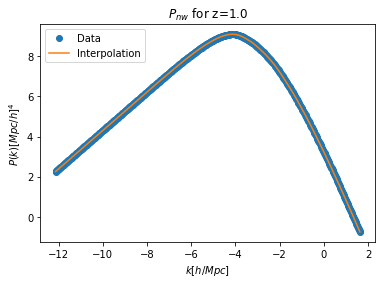

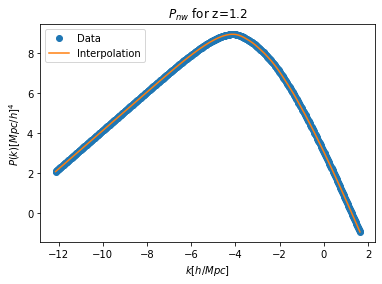

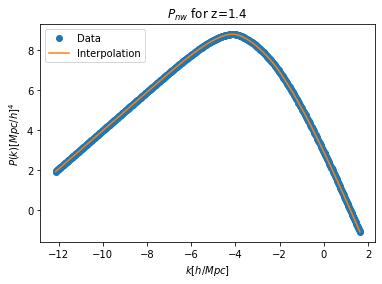

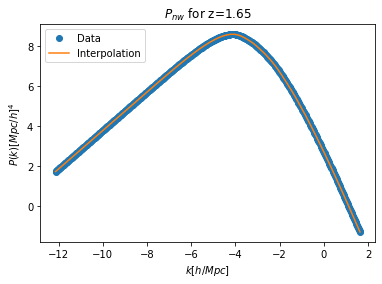

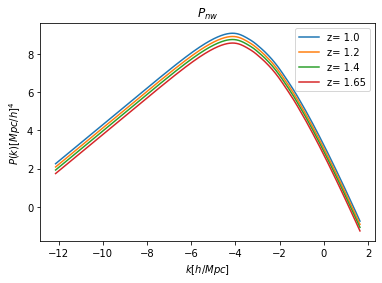

In [658]:
# For Pk_nw (no wiggled power spectrum)
Pk_nw_00 = np.loadtxt("Pk-nw-fiducial\Pk-nw-fiducial-z_00.dat")
Pk_nw_01 = np.loadtxt("Pk-nw-fiducial\Pk-nw-fiducial-z_01.dat")
Pk_nw_02 = np.loadtxt("Pk-nw-fiducial\Pk-nw-fiducial-z_02.dat")
Pk_nw_03 = np.loadtxt("Pk-nw-fiducial\Pk-nw-fiducial-z_03.dat")

Pk_nw = [Pk_nw_00,Pk_nw_01, Pk_nw_02, Pk_nw_03 ]

# Cubic spline interpolation
k_nw= np.empty(4, dtype=object)
y_nw= np.empty(4, dtype=object)
P_nw_ = np.empty(4, dtype=object)
k_nw_new= np.empty(4, dtype=object)
y_nw_new= np.empty(4, dtype=object)
# i recorren los redshifts
for i in range(0,4):
    k_nw[i] = np.log(Pk_nw[i][:,0])
    y_nw[i] = np.log(Pk_nw[i][:,1] * (Pk_nw[i][:,2]**2))
    P_nw_[i] = interpolate.interp1d(k_nw[i], y_nw[i], kind='cubic')
    k_nw_new[i] = np.log(np.arange(Pk_nw[i][:,0][0], Pk_nw[i][:,0][-1], 0.0001))
    y_nw_new[i] = P_nw_[i](k_nw_new[i])
    plt.title(r"$P_{nw}$ for z=" + f"{z_i[i]}")
    plt.plot(k_nw[i], y_nw[i], 'o', label= "Data")
    plt.plot(k_nw_new[i], y_nw_new[i], '-', label= "Interpolation")
    plt.xlabel(r"$k[h/Mpc]$")
    plt.ylabel(r"$P(k)[Mpc/h]^4$")
    plt.legend()
    plt.show()

plt.title(r"$P_{nw}$")
plt.plot(k_nw_new[0], y_nw_new[0], '-', label= f"z= {z_i[0]}")
plt.plot(k_nw_new[1], y_nw_new[1], '-', label= f"z= {z_i[1]}")
plt.plot(k_nw_new[2], y_nw_new[2], '-', label= f"z= {z_i[2]}")
plt.plot(k_nw_new[3], y_nw_new[3], '-', label= f"z= {z_i[3]}")
plt.xlabel(r"$k[h/Mpc]$")
plt.ylabel(r"$P(k)[Mpc/h]^4$")
plt.legend()
plt.show()

def P_nw(k, zi):
    i = z_i.index(zi)
    return P_nw_[i](k)
        

Obteniendo los datos para las derivadas.

Se define Pk_mn como matriz en la cual sus filas representan un mismo bin y sus columnas representan las derivadas para cada parámetro. 
La derivada para un parámetro corresponde a la posición en la lista param de este parámetro.

In [659]:
param = ['h', 'ns', 'wb', 'wm']

# Derivatives with negative step (mn)
Pk_mn = np.empty((4,4), dtype=object)
columnas = -1
for j in param:
    columnas= columnas + 1
    for i in range(4):
        Pk_mn[i][columnas] = np.loadtxt("Pk-derivative\Pk_"+j+"_mn_eps_1p0E-2\Pk-"+j+"_mn_eps_1p0E-2-z_" + "{:02d}".format(i) + ".dat")

#Ejemplo: Pk_mn[0][1]
#es Pk_mn para el bin 0 y el parámetro ns

# Cubic spline interpolation
k_mn= np.empty((4,4), dtype=object)
y_mn= np.empty((4,4), dtype=object)
P_mn_ = np.empty((4,4), dtype=object)
k_mn_new= np.empty((4,4), dtype=object)
y_mn_new= np.empty((4,4), dtype=object)

# j recorre los parámetros
for j in range(0,4):
    # i recorren los redshifts
    for i in range(0,4):
        k_mn[i][j] = np.log(Pk_mn[i][j][:,0])
        y_mn[i][j] = np.log(Pk_mn[i][j][:,1] * (Pk_mn[i][j][:,2]**2))
        P_mn_[i][j] = interpolate.interp1d(k_mn[i][j], y_mn[i][j], kind='cubic')
        k_mn_new[i][j] = np.log(np.arange(Pk_mn[i][j][:,0][0], Pk_mn[i][j][:,0][-1], 0.0001))
        y_mn_new[i][j] = P_mn_[i][j](k_mn_new[i][j])
        #plt.plot(k_mn[i][j], y_mn[i][j], 'o', k_mn_new[i][j], y_mn_new[i][j], '-')
        #plt.show()

def P_mn(k, zi, j):
    i = z_i.index(zi)
    return P_mn_[i][j](k)

In [660]:
# Derivatives with positive step (pl)
Pk_pl = np.empty((4,4), dtype=object)
columnas = -1
for j in param:
    columnas= columnas + 1
    for i in range(4):
        Pk_pl[i][columnas] = np.loadtxt("Pk-derivative\Pk_"+j+"_pl_eps_1p0E-2\Pk-"+j+"_pl_eps_1p0E-2-z_" + "{:02d}".format(i) + ".dat")

# Cubic spline interpolation
k_pl= np.empty((4,4), dtype=object)
y_pl= np.empty((4,4), dtype=object)
P_pl_ = np.empty((4,4), dtype=object)
k_pl_new= np.empty((4,4), dtype=object)
y_pl_new= np.empty((4,4), dtype=object)

# j recorre los parámetros
for j in range(0,4):
    # i recorren los redshifts
    for i in range(0,4):
        k_pl[i][j] = np.log(Pk_pl[i][j][:,0])
        y_pl[i][j] = np.log(Pk_pl[i][j][:,1] * (Pk_pl[i][j][:,2]**2))
        P_pl_[i][j] = interpolate.interp1d(k_pl[i][j], y_pl[i][j], kind='cubic')
        k_pl_new[i][j] = np.log(np.arange(Pk_pl[i][j][:,0][0], Pk_pl[i][j][:,0][-1], 0.0001))
        y_pl_new[i][j] = P_pl_[i][j](k_pl_new[i][j])
        #plt.plot(k_pl[i][j], y_pl[i][j], 'o', k_pl_new[i][j], y_pl_new[i][j], '-')
        #plt.show()

def P_pl(k, zi, j):
    i = z_i.index(zi)
    return P_pl_[i][j](k)

In [661]:
# Derivatives with negative step (mn)
Pk_nw_mn = np.empty((4,4), dtype=object)
columnas = -1
for j in param:
    columnas= columnas + 1
    for i in range(4):
        Pk_nw_mn[i][columnas] = np.loadtxt("Pk-nw-derivative\Pk_"+ j +"_mn_eps_1p0E-2\Pk-nw-" +j+ "_mn_eps_1p0E-2-z_" + "{:02d}".format(i) + ".dat")

# Cubic spline interpolation
k_nw_mn= np.empty((4,4), dtype=object)
y_nw_mn= np.empty((4,4), dtype=object)
P_nw_mn_ = np.empty((4,4), dtype=object)
k_nw_mn_new= np.empty((4,4), dtype=object)
y_nw_mn_new= np.empty((4,4), dtype=object)

# j recorre los parámetros
for j in range(0,4):
    # i recorren los redshifts
    for i in range(0,4):
        k_nw_mn[i][j] = np.log(Pk_nw_mn[i][j][:,0])
        y_nw_mn[i][j] = np.log(Pk_nw_mn[i][j][:,1] * (Pk_nw_mn[i][j][:,2]**2))
        P_nw_mn_[i][j] = interpolate.interp1d(k_nw_mn[i][j], y_nw_mn[i][j], kind='cubic')
        k_nw_mn_new[i][j] = np.log(np.arange(Pk_nw_mn[i][j][:,0][0], Pk_nw_mn[i][j][:,0][-1], 0.0001))
        y_nw_mn_new[i][j] = P_nw_mn_[i][j](k_nw_mn_new[i][j])
        #plt.plot(k_mn[i][j], y_mn[i][j], 'o', k_mn_new[i][j], y_mn_new[i][j], '-')
        #plt.show()

def P_nw_mn(k, zi, j):
    i = z_i.index(zi)
    return P_nw_mn_[i][j](k)

In [662]:
# Derivatives with positive step (pl)
Pk_nw_pl = np.empty((4,4), dtype=object)
columnas = -1
for j in param:
    columnas= columnas + 1
    for i in range(4):
        Pk_nw_pl[i][columnas] = np.loadtxt("Pk-nw-derivative\Pk_"+ j +"_pl_eps_1p0E-2\Pk-nw-" +j+ "_pl_eps_1p0E-2-z_" + "{:02d}".format(i) + ".dat")

# Cubic spline interpolation
k_nw_pl= np.empty((4,4), dtype=object)
y_nw_pl= np.empty((4,4), dtype=object)
P_nw_pl_ = np.empty((4,4), dtype=object)
k_nw_pl_new= np.empty((4,4), dtype=object)
y_nw_pl_new= np.empty((4,4), dtype=object)

# j recorre los parámetros
for j in range(0,4):
    # i recorren los redshifts
    for i in range(0,4):
        k_nw_pl[i][j] = np.log(Pk_nw_pl[i][j][:,0])
        y_nw_pl[i][j] = np.log(Pk_nw_pl[i][j][:,1] * (Pk_nw_pl[i][j][:,2]**2))
        P_nw_pl_[i][j] = interpolate.interp1d(k_nw_pl[i][j], y_nw_pl[i][j], kind='cubic')
        k_nw_pl_new[i][j] = np.log(np.arange(Pk_nw_pl[i][j][:,0][0], Pk_nw_pl[i][j][:,0][-1], 0.0001))
        y_nw_pl_new[i][j] = P_nw_pl_[i][j](k_nw_pl_new[i][j])
        #plt.plot(k_mn[i][j], y_mn[i][j], 'o', k_mn_new[i][j], y_mn_new[i][j], '-')
        #plt.show()

def P_nw_pl(k, zi, j):
    i = z_i.index(zi)
    return P_nw_pl_[i][j](k)

Parámetros a encontrar:
$D_A(z_i)$, $H(z_i)$, $f\sigma_8(z_i)$, $b\sigma_8$ , $P_s(z_i)$, $\omega_{b,0}$, $h$, $\omega_{m,0}$, $n_s$, $\sigma_v (z_{mean})$ y $\sigma_p (z_{mean})$


In [663]:
#Fiducial parameters
wb = 0.022445
wm = 0.143648
h = 0.67

Om_b0 = wb/ (h**2)
H0 = 100 * h

Om_m0 = wm/ (h**2)
ns = 0.96


c = 300.000

'''
Qué es As10^9?
# Donde se usa? y por qué se especifica el A_s^9
'''
A_s9 = 2.12605
# Reference amplitud As
A_s = 2.1260500000000005e-9
s8_ref = 0.815583

''' 
Cuáles son los non-pyhsical base and physical? y xq la suma no da Om_m?
'''
# Corresponding non-physical base parameters: {Omegab,  Omegac, h, 10^9 As} :> {0.05000000000000001, 0.2671256676696824, 0.67, 2.1260500000000007}
Om_b_np= 0.05000000000000001
Om_c_np = 0.2671256676696824
A_s9 = 2.1260500000000007
# Corresponding physical base parameters: {omegab,  omegac, h, 10^9 As} :> {0.022445000000000007, 0.11991271221692044, 0.67, 2.1260500000000007}
Om_b_p= 0.022445000000000007
Om_c_p = 0.11991271221692044

# Halofit version in CAMB: 4
# Maximum k value in CAMB (h/Mpc): 5
# Numeric CAMB parameters : {AccuracyBoost -> 2, TransferHighPrecision -> True, TransferKperLogInt -> 50}
# Constant Neutrino CAMB parameters : {OmegaNu -> 0.00143717, MasslessNeutrinos -> 2.046, MassiveNeutrinos -> 1, NuMassFractions -> {1}}
Om_nu = 0.00143717

# Defining Om_c
Om_c0 = Om_m0 - Om_b0 - Om_nu

print('Om_m:', Om_m0)
print('physical Om_m:', Om_b_p + Om_c_p + Om_nu)
print('non-physical Om_m:',Om_b_np + Om_c_np + Om_nu)

# np.sqrt(Om_m0 + Om_DE0 + Om_k0) = 1
Om_DE0 = - Om_m0  

m_nu = 0.06
w_0 = -1
w_a = 0

A_surv = 15000
s_z = 0.0001 #Spectroscopic redshift error

P_s = 0


Om_m: 0.31999999999999995
physical Om_m: 0.14379488221692044
non-physical Om_m: 0.31856283766968235


In [664]:
# s8 es el mismo para cada z
s8 = np.zeros_like(z_i)
bs8 = np.zeros_like(z_i)
fs8 = np.zeros_like(z_i)
for i in range(0, 4):
        s8[i]= Pk_[i][0,2]
        bs8[i] = b[i]* s8[i]
        fs8[i] = f[i]* s8[i]

In [665]:
def E(z):
    return np.sqrt((Om_m0*(1+z)**(3)) + Om_DE0)

def H_ref(z):
    return H0 * E(z)

def r(z):
    a = 1/E(z)
    return (c/H0) * np.cumsum(a, dtype=float)  

def D_A_ref(z):
    return (1+z)**(-1) * r(z)


In [666]:
#El del profe modificado
def sigmas_nl(zi):
    j = z_i.index(zi)
    kminint = 0.001*h
    kmaxint = 5*h
    kgrid1 = np.linspace(np.log(kminint), np.log(kmaxint), 2**12+1)
    dk = np.diff(kgrid1)[0]
    I1 = np.cumsum(dk*np.exp(kgrid1)*np.exp(P_dd(kgrid1, zi)))
    # sigma_v and sigma_p
#        return s8tab[nbinmean]**2*np.sqrt(I1[-1]/(6*np.pi**2)), s8tab[nbinmean]*np.sqrt(I1[-1]/((6*np.pi**2)))
    return s8[j]*np.sqrt(I1[-1]/(6*np.pi**2)), np.sqrt(I1[-1]/((6*np.pi**2)))

print(sigmas_nl(z_i[0]))

(1.754287453553944, 3.549932031586294)


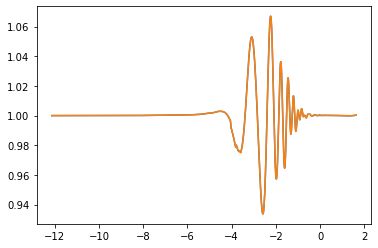

In [667]:
# In practice:
#sv(z) controls the strength of the non-linear damping of the BAO signal in all directions.
def sv_(zi):
  j = z_i.index(zi)
  I = np.trapz(np.exp(P_dd(k_new[j], z_i[j])), np.exp(k_new[j]))
  return np.sqrt((1/(6* (np.pi**2)))* I)

def sp_(zi):
  return sv_(zi)

sv = [sv_(z_i[0]), sv_(z_i[1]), sv_(z_i[2]), sv_(z_i[3])]
''' 
Con sv tan grande la solución no decae (la solución me da 3)
'''
#sv = [0.1,0.1,0.1,0.1]
sp = [sp_(z_i[0]), sp_(z_i[1]), sp_(z_i[2]), sp_(z_i[3])]


# Comoving distance error sr
def F_z(k_ref,u_ref,z):
  return np.exp(-((k_ref* u_ref*c *(1+z)* s_z)/H_ref(z))**2)

def qpar(z, H = None):
  H_value = H_ref(z) if H is None else H
  return H_ref(z)/H_value

def qper(z, D_A = None):
  D_A_value = D_A_ref(z) if D_A is None else D_A
  return D_A_value/ D_A_ref(z)


# To convert the known reference k_ref and mu_ref to the unknown, true k and mu
def k(z, k_ref, u_ref, H = None, D_A = None):
  qper1 = qper(z, D_A = D_A)
  qpar1 = qpar(z, H = H)
  return (k_ref /qper1)* (1 + u_ref**2 * ((qper1**2/qpar1**2) -1))**(1/2)

def u(z, k_ref, u_ref, H = None, D_A = None):
  qper1 = qper(z, D_A = D_A)
  qpar1 = qpar(z, H = H)
  return u_ref * (qper1/qpar1) * (1 + u_ref**2 * ((qper1**2/qpar1**2) -1))**(-1/2)

# Non-linear damping factor of the BAO signal.
def g_u(u, zi, sv1 = None):
  bin = z_i.index(zi)
  sv1_value = sv[bin] if sv1 is None else sv1
  return sv1_value**2 *(1- u**2 + (u**2)*(1+ f[bin])**2)

def P_dw(k, u, z, sv1 = None, paso = None, var = None):
  bin = z_i.index(z)
  sv1_value = sv[bin] if sv1 is None else sv1
  if paso == None:
    return P_dd(k, z)* np.exp(-g_u(u ,z , sv1 = sv1_value)*k**2) + P_nw(k, z)* (1- np.exp(-g_u(u,z, sv1 = sv1_value)*k**2))
  
  elif paso == 'pl':
    return P_pl(k, z, var)* np.exp(-g_u(u,z)*k**2) + P_nw_pl(k, z, var)* (1- np.exp(-g_u(u,z)*k**2))
    
  else:
    return P_mn(k, z, var)* np.exp(-g_u(u,z)*k**2) + P_nw_mn(k, z, var)* (1- np.exp(-g_u(u,z)*k**2))

u_prueba = np.linspace(-1,1, 50927)

k1 = k(z_i[0],k_new[0], u_prueba) 
k2 = k(z_i[0],k_nw_new[0], u_prueba) 
u1 = u(z_i[0],k_new[0], u_prueba)

plt.plot(k2, np.exp(P_nw(k2, z_i[0]))/np.exp(P_dd(k1,  z_i[0])))
plt.plot(k_new[0], np.exp(P_dw(k2, u_prueba, z_i[0]))/np.exp(P_dd(k_new[0],  z_i[0])))
plt.show()

In [668]:
# Full non-linear model
def P_obs(k_ref, u_ref, zi, bs81=None, fs81=None, f1= None , sp1=None, s81= None, H= None, D_A = None):
  bin = z_i.index(zi)
  bs8_value = bs8[bin] if bs81 is None else bs81
  fs8_value = fs8[bin] if fs81 is None else fs81
  f_value = f[bin] if f1 is None else f1
  sp_value = sp[bin] if sp1 is None else sp1
  s8_value = s8[bin] if s81 is None else s81
  
  H_value = None if H is None else H
  D_A_value = None if D_A is None else D_A
  
  k_eval = k(zi, k_ref, u_ref, H = H_value, D_A = D_A_value)
  u_eval = u(zi, k_ref, u_ref, H = H_value, D_A = D_A_value)

  # Cómo saco la dependencia de H para H_value = None
  return (1/(qpar(zi, H= H_value)**2 * qper(zi, D_A = D_A_value)))*((bs8_value + fs8_value*u_eval**2)**2/(1+(f_value*k_eval*u_eval*sp_value)**2)) * (P_dw(k_eval,u_eval,zi)/s8_value**2)* F_z(k_eval,u_eval,zi) + P_s


def V_eff(zi, k, u):
  bin = z_i.index(zi)
  return V_s[bin] * (n[bin])*P_obs(k,u, zi)/(n[bin]*P_obs(k,u, zi) + 1)**2

In [669]:
# epsilon varía entre los 0.0001 y 0.01
def derivada_ln_P_obs(k_ref, u_ref, z, a, eps =1e-2):
    #h: Tamaño del paso (opcional, por defecto 1e-5)
    k1= k(z, k_ref, u_ref)
    u1= u(z, k_ref, u_ref)
    
    bin = z_i.index(z)
    if a == 'Ps':
      derivada = 1/ np.log(P_obs(k_ref, u_ref, z))
    # if are shape parameters w_b0 , h, w_m0 , ns
    elif a == 'wb' or a== 'h' or a == 'wm' or a == 'ns':
      # str to function
      if a == 'wb':
        a1 = wb
      elif a == 'h':
        a1 = h
      elif a == 'wm':
        a1 = wm
      elif a == 'ns':
        a1 = ns
      
      for j in range(0,4):
        if a == param[j]:
          var = j
          #¿donde queda a1 = a1*(1+ eps)?
          derivada = (np.log(P_dw(k1, u1, z, paso = 'pl', var = var)/s8[bin]**2)- np.log(P_dw(k1, u1, z, paso = 'mn', var = var)/s8[bin]**2) )/ (2 * eps* a1)

    # if are non-linear parameters sv y sp
    #three-point stencil derivative of f with respect to x at x0
    elif a == 'sv':
      derivada = (np.log(P_dw(k1, u1, z, sv1 = sv[bin]*(1+ eps))/ s8[bin]**2)- np.log(P_dw(k1, u1, z, sv1 = sv[bin]*(1 - eps))/ s8[bin]**2)) / (2 * eps * np.log(P_dw(k1, u1, z, sv1 = sv[bin])/ s8[bin]**2))

    elif a == 'sp':
      term_pos = (f[bin]*k1*u1*sp[bin]*(1+ eps))**2
      term_neg = (f[bin]*k1*u1*sp[bin]*(1- eps))**2
      term = (f[bin]*k1*u1*sp[bin])**2
      derivada = (np.log(1/ (1+ term_pos))- np.log(1 / (1+ term_neg))) / (2 * eps * np.log(1/ (1+ term)))
      
    # if parameters are fs8 and bs8
    elif a == 'fs8':
      derivada = (np.log(P_obs(k_ref, u_ref, z, fs81 = fs8[bin]**(1 + eps))) - np.log(P_obs(k_ref, u_ref, z, fs81 = fs8[bin]**(1 - eps)))) / (2* eps * np.log(fs8[bin]))

    elif a == 'bs8':
      derivada = (np.log(P_obs(k_ref, u_ref, z, bs81 = bs8[bin]**(1 + eps))) - np.log(P_obs(k_ref, u_ref, z, bs81 = bs8[bin]**(1 - eps)))) / (2* eps * np.log(bs8[bin]))


    elif a == 'H':
      derivada = 8* (np.log(P_obs(k_ref, u_ref, z, H= H_ref(z)**(1+ eps)))- np.log(P_obs(k_ref, u_ref, z, H= H_ref(z)**(1- eps))))/(12* eps * np.log(H_ref(z))) - (np.log(P_obs(k_ref, u_ref, z, H= H_ref(z)**(1+ 2*eps)))- np.log(P_obs(k_ref, u_ref, z, H= H_ref(z)**(1 - 2*eps))))/(12* eps * np.log(H_ref(z)))
    elif a == 'D_A':
      derivada = 8* (np.log(P_obs(k_ref, u_ref, z, D_A = D_A_ref(z)**(1+ eps)))- np.log(P_obs(k_ref, u_ref, z, D_A = D_A_ref(z)**(1- eps))))/(12* eps * np.log(D_A_ref(z))) - (np.log(P_obs(k_ref, u_ref, z, D_A = D_A_ref(z)**(1+ 2*eps)))- np.log(P_obs(k_ref, u_ref, z, D_A = D_A_ref(z)**(1 - 2*eps))))/(12* eps * np.log(D_A_ref(z)))

    return derivada



In [670]:
def double_integral(func, u_range, k_range, num_intervals_u, num_intervals_k, zi, a, b):
    # Crea una malla de puntos en el plano de integración
    u_vals = np.linspace(u_range[0], u_range[1], num_intervals_u)
    k_vals = np.linspace(k_range[0], k_range[1], num_intervals_k)

    # Evalúa la función en cada punto de la malla
    z_vals = np.zeros((num_intervals_u, num_intervals_k))
    for j in range(num_intervals_k):
        z_vals[:,j] = func(u_vals, k_vals[j], zi, a, b)

    # Integra a lo largo del eje y (primera integral)
    integral_k = np.trapz(z_vals, x=u_vals, axis=0)
    # Integra a lo largo del eje x (segunda integral)
    integral = np.trapz(integral_k, x=k_vals)

    return integral

# Ejemplo de una función para integrar
def func_to_integrate(u_ref, k_ref, zi, a, b):
  return (k_ref)**2 * derivada_ln_P_obs(k_ref, u_ref, zi, a) *derivada_ln_P_obs(k_ref, u_ref, zi, b)* V_eff(zi, k_ref, u_ref)

# Define los límites de integración y el número de intervalos en cada dimensión
#Pessimistic setting
''' 
está bien poner los límites en la exponencial?
'''
x_range = [np.exp(0.001), np.exp(0.25)]
y_range = [-1, 1]
num_intervals_x = 100
num_intervals_y = 100


In [671]:
# Calcula la integral doble numéricamente
a = 'bs8'
b = 'sp'
result = double_integral(func_to_integrate, x_range, y_range, num_intervals_x, num_intervals_y, z_i[0], a, b)
print("Resultado de la integral doble para el bin 0:", result)

Resultado de la integral doble para el bin 0: 0.0037395779058287445


In [672]:
#Pruebas
a = 'sv'
b = 'sv'
result = double_integral(func_to_integrate, x_range, y_range, num_intervals_x, num_intervals_y, z_i[0], a, b)
print("Resultado de la integral doble para el bin 0:", result)

Resultado de la integral doble para el bin 0: 5.917240865368995e-14


In [673]:
shape_param = ['wb', 'h', 'wm', 'ns', 'sv', 'sp']
redshift_param= [ 'D_A', 'H', 'fs8', 'bs8', 'Ps']
parameters = shape_param + redshift_param

# Matriz de 6 x 6 shape parameters 
# Matriz de 5 x 5 redshift dependant parameters
F_ij = np.empty((11,11))
for i in range(len(parameters)):
    for j in range(len(parameters)):
        a = parameters[i]
        b = parameters[j]
        result = double_integral(func_to_integrate, x_range, y_range, num_intervals_x, num_intervals_y, z_i[0], a, b)
        F_ij[i][j] = result

In [674]:
print(F_ij)

[[ 5.47506364e-01 -7.41490707e-03 -2.29827003e-01 -4.70828874e-02
  -4.15291349e-08 -3.56993609e-02  6.10406231e-02  2.52631926e-02
  -3.11969998e-02 -3.97630309e-02  7.73409036e-03]
 [-7.41490707e-03  1.22284066e-04  3.05230954e-03  5.87960050e-04
   6.82915276e-10  6.24019559e-04 -1.01643736e-03 -1.91869249e-04
   5.51530620e-04  7.03065549e-04  1.33589279e-04]
 [-2.29827003e-01  3.05230954e-03  9.66407080e-02  1.99011937e-02
   1.70868699e-08  1.45949755e-02 -2.50992948e-02 -1.10228237e-02
   1.27394498e-02  1.62372009e-02 -3.90738373e-03]
 [-4.70828874e-02  5.87960050e-04  1.99011937e-02  4.16443648e-03
   3.16022367e-09  2.72367365e-03 -4.80833702e-03 -2.54621557e-03
   2.38301418e-03  3.03738180e-03 -1.24294331e-03]
 [-4.15291349e-08  6.82915276e-10  1.70868699e-08  3.16022367e-09
   5.91724087e-14  6.34070142e-09 -6.00108649e-09  2.97840276e-09
   3.38074548e-09  4.36464058e-09  1.47196716e-09]
 [-3.56993609e-02  6.24019559e-04  1.45949755e-02  2.72367365e-03
   6.34070142e-09  

In [675]:
# Sacando la matriz de covarianza
C = np.linalg.inv(F_ij)
print(C)

[[ 8.77995639e+06  7.02694599e+07  2.65274540e+07 -3.08671385e+07
  -2.09049081e+09 -5.45912041e+04 -3.25949056e+04  3.28291022e+04
  -5.03183260e+06 -5.01768162e+06 -2.10796712e+00]
 [ 7.02694599e+07  5.92048578e+08  2.22981100e+08 -2.91940011e+08
  -1.42917287e+10 -1.14690766e+06 -6.21620442e+05  6.28226514e+05
  -4.80438901e+07 -4.77936040e+07 -2.08544460e+01]
 [ 2.65274540e+07  2.22981100e+08  8.50627755e+07 -1.13590723e+08
  -5.10543005e+09 -9.54398959e+05 -5.46722049e+05  5.48670750e+05
  -1.86577473e+07 -1.84628709e+07 -8.94260922e+00]
 [-3.08671385e+07 -2.91940011e+08 -1.13590723e+08  1.92876975e+08
   9.14650210e+08  3.10297362e+06  1.71252983e+06 -1.71220795e+06
   3.19468964e+07  3.12748427e+07  1.81715134e+01]
 [-2.09049081e+09 -1.42917287e+10 -5.10543005e+09  9.14650207e+08
   4.60731326e+13  1.66717022e+09  1.63066013e+09 -1.63747868e+09
   1.25387043e+09  1.24078612e+09 -2.76344211e+02]
 [-5.45912042e+04 -1.14690766e+06 -9.54398960e+05  3.10297362e+06
   1.66717022e+09  

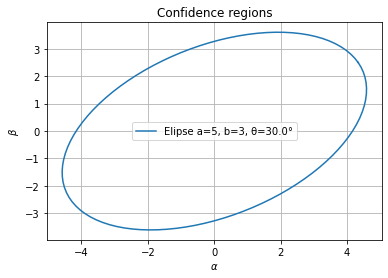

In [676]:
def plot_ellipse(a, b, phi):
    t = np.linspace(0, 2 * np.pi, 100)    

    x = a * np.cos(t)
    y = b * np.sin(t)
    
    #rotación
    x_rot = x * np.cos(phi) - y * np.sin(phi)
    y_rot = x * np.sin(phi) + y * np.cos(phi)
    fig, ax = plt.subplots()
    
    # Graficar la elipse
    ax.plot(x_rot, y_rot, label=f'Elipse a={round(a, 2)}, b={round(b, 2)}, θ={np.degrees(phi):.1f}°')
    
    plt.legend()
    plt.title('Confidence regions')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\beta$')
    plt.grid(True)
    plt.show()

# Parámetros de la elipse
a = 5        # Eje semi mayor
b = 3      # Eje semi menor
phi = np.radians(30)  # Ángulo de inclinación
plot_ellipse(a, b, phi)


phi= 0.009841007334264474
a= 37420.302837516494
b= 8367.927917673647


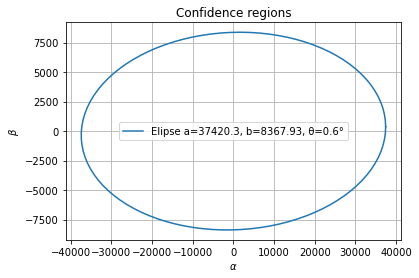

' \nlos ejes son muy diferentes y phi es 0 :/\n'

In [682]:
#alpha = h
#beta = wm
A = 2.3
alpha = 2
beta = 3
# A = 6.18 2 sigma
#A = 11.8  3 sigma
a = A * np.sqrt((0.5 *(C[alpha,alpha] + C[beta,beta])) + np.sqrt((0.25*((C[alpha,alpha] - C[beta,beta])**2)) + (C[alpha, beta]**2)))
b = A * np.sqrt((0.5 *(C[alpha,alpha] + C[beta,beta])) - np.sqrt((0.25*((C[alpha,alpha] - C[beta,beta])**2)) + (C[alpha, beta]**2)))
phi = np.radians(0.5 * np.arctan((2* C[alpha, beta]) / (C[alpha,alpha] - C[beta,beta])))
print('phi=', phi)
print('a=', a)
print('b=', b)

plot_ellipse(a, b, phi)
''' 
los ejes son muy diferentes. Phi es muy pequeño, está bien?
'''


In [678]:
# def D_A_ref(z):
#     if Om_k0 < 0:
#         return (1+z)**(-1) * (c/H0) * (1/ np.sqrt(-Om_k0))* np.sin(np.sqrt(-Om_k0) * (H0/c) * r(z))
#     elif Om_k0 == 0:
#         return (1+z)**(-1) * r(z)
#     else:
#         return (1+z)**(-1) * (c/H0) * (1/ np.sqrt(Om_k0))* np.sinh(np.sqrt(Om_k0) * (H0/c) * r(z))